# Decision Tree Exercises

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
!pip install graphviz
import graphviz
import matplotlib.pyplot as plt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.1/47.1 kB 9.3 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.0.1 -> 24.1.2
[notice] To update, run: pip install --upgrade pip


## Loading Data

Load Pima Diabetes dataset and split data using test size of 20% per split.

In [11]:
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']

data = pd.read_csv(url, names=names)
print(data)
X = data.drop('class', axis=1)
y = data.loc[:, 'class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

     preg  plas  pres  skin  test  mass   pedi  age  class
0       6   148    72    35     0  33.6  0.627   50      1
1       1    85    66    29     0  26.6  0.351   31      0
2       8   183    64     0     0  23.3  0.672   32      1
3       1    89    66    23    94  28.1  0.167   21      0
4       0   137    40    35   168  43.1  2.288   33      1
..    ...   ...   ...   ...   ...   ...    ...  ...    ...
763    10   101    76    48   180  32.9  0.171   63      0
764     2   122    70    27     0  36.8  0.340   27      0
765     5   121    72    23   112  26.2  0.245   30      0
766     1   126    60     0     0  30.1  0.349   47      1
767     1    93    70    31     0  30.4  0.315   23      0

[768 rows x 9 columns]


## Creating Model

Make a model using sklearn's `DecisionTreeClassifier`. Set the parameters to a high maximum depth and a low minimum samples leaf.

In [3]:
modelOF = DecisionTreeClassifier(max_depth=20, min_samples_leaf=3)

Print accuracy of training and validation data.

In [4]:
modelOF.fit(X_train, y_train)
print(f"{modelOF.score(X_train, y_train):.2f}%")
print(f"{modelOF.score(X_test, y_test):.2f}%")

0.92%
0.67%


Make a model with a low maximum depth and a higher minimum samples leaf. Feel free to play around with these parameters.

In [5]:
model = DecisionTreeClassifier(max_depth=6, min_samples_leaf=3)

Print accuracy of training and validation data.

In [6]:
model.fit(X_train, y_train)
print(f"{model.score(X_train, y_train):.2f}%")
print(f"{model.score(X_test, y_test):.2f}%")

0.84%
0.70%


Explain the accuracy results below.

> Answer: The first model overfits because the maximum depth is high, while the second model is fit correctly.

## Metrics

Plot the ROC curve and print the AUC of the second model.

0.7735272988505747


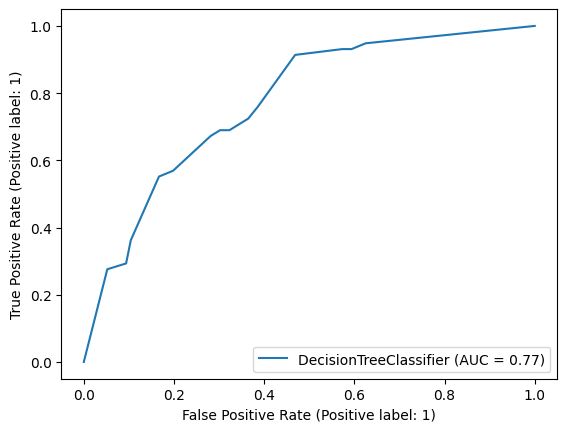

In [10]:
from sklearn.metrics import RocCurveDisplay, roc_auc_score
print(roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]))
RocCurveDisplay.from_estimator(model, X_test, y_test)

Use Graphviz to visualize your second tree.

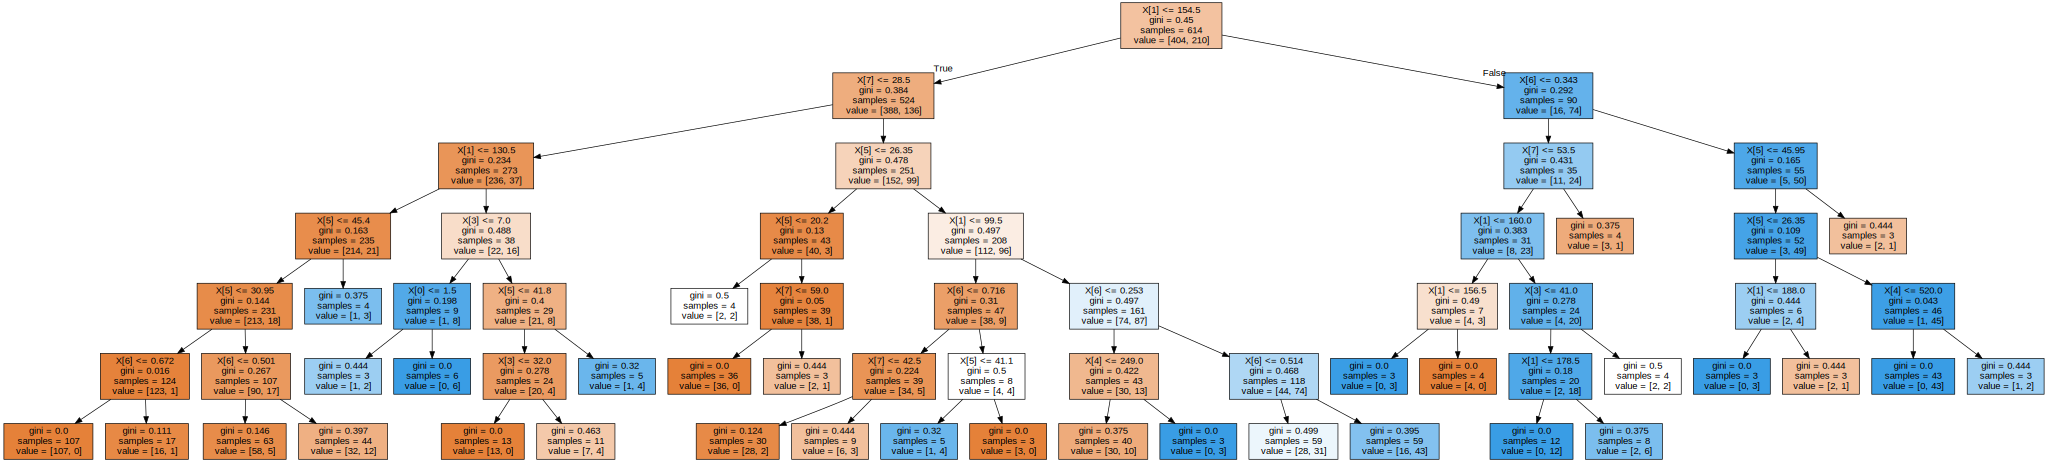

In [9]:
dot_data = tree.export_graphviz(model, out_file=None, filled=True)

graph = graphviz.Source(dot_data)
graph

#### Use the graph above to answer the questions below

Question 1: What do you think $X[n]$ represents in the nodes from the graph?

> Answer: X[n] is the value of the nth feature

Question 2: What is the root feature? Does it make sense as the root feature?

> Answer: X[1] is the root feature (diabetes pedigree function), which makes sense because genetics play a huge role in diabetes

Question 3: If you were to change the parameters to have a `max_depth` of 500 and `min_samples_leaf` of 1, what do you think the effect would be on the testing accuracy? Training accuracy?

> Answer: Training accuracy would go up to 100% while testing would  go down. (overfit)

**Test your guesses**: Create a model with `max_depth`=500 and `min_samples_leaf`=1, and predict values for the training and validation data.

In [14]:
modelMD = DecisionTreeClassifier(max_depth=500, min_samples_leaf=1)
modelMD.fit(X_train, y_train)
print(f"{modelMD.score(X_train, y_train):.2f}%")
print(f"{modelMD.score(X_test, y_test):.2f}%")

1.00%
0.67%


# Random Forest

## Creating Model

Create a model with sklearn's `RandomForestClassifier` and predict values on your validation set.

In [27]:
rf = RandomForestClassifier(n_estimators=10, max_depth=6, min_samples_leaf=3)
rf.fit(X_train, y_train)
rf.predict(X_test)

array([1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0])

Print accuracy of training and validation data.

In [28]:
print(f"{rf.score(X_train, y_train):.2f}%")
print(f"{rf.score(X_test, y_test):.2f}%")

0.86%
0.75%


How did the accuracy compare to the decision tree's accuracy?

> Answer: The accuracy is higher

Print the 3 most important features (hint: sklearn has an attribute to help you find these).

In [30]:
fi = rf.feature_importances_
data.columns[np.argpartition(fi, -3)[-3:]]

Index(['age', 'mass', 'plas'], dtype='object')

Find the accuracies for random forests with 1 to 100 trees, counting by 5. Plot these accuracies.

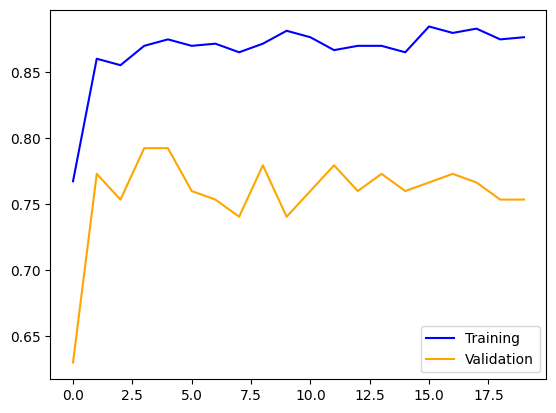

In [38]:
accV = []
acc = []

for i in range(1, 101, 5):
    rf = RandomForestClassifier(n_estimators=i, max_depth=6, min_samples_leaf=3)
    rf.fit(X_train, y_train)
    
    acc.append(rf.score(X_train, y_train))
    accV.append(rf.score(X_test, y_test))

plt.plot(acc, c='b', label='Training')
plt.plot(accV, c='orange', label='Validation')
plt.legend()

Plot the ROC curve using the `predict_proba()` function for our random forest model and `metrics.roc_curve()`.

It will help to look up these functions and read sklearn's documentation.

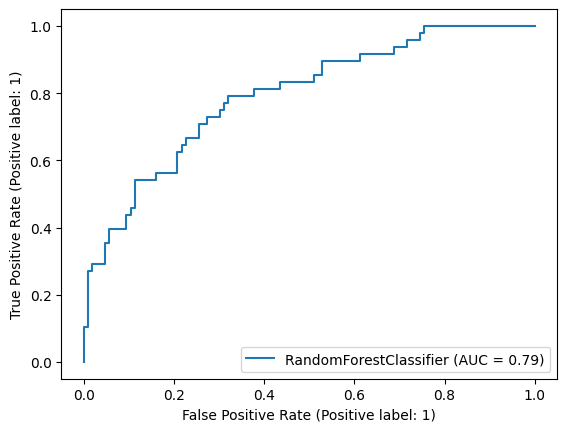

In [39]:
RocCurveDisplay.from_estimator(rf, X_test, y_test)

### Extra
If you have time, try to view the trees in your random forest by looping through the model's `estimators_` attribute (hint: first reduce the number of estimators in your tree for better visualization).

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=0cca5f50-39f8-471d-8735-226387513f26' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>